In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats 
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('Davis.csv', index_col=0)

In [3]:
data

,sex,weight,height,repwt,repht
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN
199,M,90,181,91.0,178.0


In [4]:
def get_proportion(data):
    male_count = (data['sex'] == 'M').sum()
    female_count = (data['sex'] == 'F').sum()
    male_prop = male_count / (data['sex'].count())
    female_prop = female_count / (data['sex'].count())
    return male_prop, female_prop 

In [5]:
male_prop, female_prop = get_proportion(data)
print('Процент женщин: %f \nПроцент мужчин: %f' %(female_prop, male_prop))

Процент женщин: 0.560000 
Процент мужчин: 0.440000


In [6]:
train, test = train_test_split(data, train_size=0.5, random_state=42, stratify=data['sex'])

male_prop_train, female_prop_train = get_proportion(train)
male_prop_test, female_prop_test = get_proportion(test)
print('Процент женщин (трен. выб.): %f \nПроцент мужчин (трен. выб.): %f' %(female_prop_train, male_prop_train))
print('Процент женщин (тест. выб.): %f \nПроцент мужчин (тест. выб.): %f' %(female_prop_test, male_prop_test))

print(test['sex'].count())
print(train['sex'].count())

Процент женщин (трен. выб.): 0.560000 
Процент мужчин (трен. выб.): 0.440000
Процент женщин (тест. выб.): 0.560000 
Процент мужчин (тест. выб.): 0.440000
100
100


## б) Очистка от выбросов


### Обнаружение отсутствующих данных
#### Найдем количество отсутствующих данных в процентах

In [7]:
data.isna().any()

sex       False
weight    False
height    False
repwt      True
repht      True
dtype: bool

In [8]:
for col in data.columns:
    val_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(val_missing*100)))

sex - 0%
weight - 0%
height - 0%
repwt - 8%
repht - 8%


#### Построим тепловую карту пропущенных значений

<AxesSubplot:>

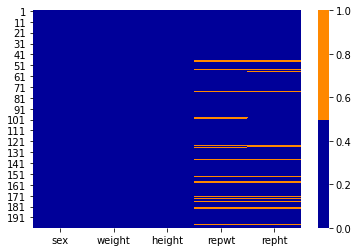

In [9]:
colours = ['#000099', '#ff8800'] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

#### Можно заметить что отсутствующие значения находятся только в столбцах 'repwt' и 'repht'

### Обнаружение людей с нереалистичным ростом\весом.

<AxesSubplot:xlabel='weight', ylabel='height'>

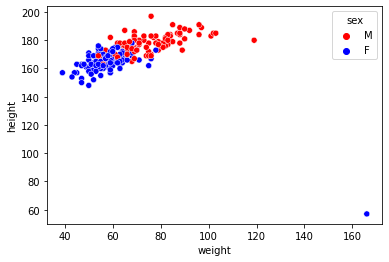

In [10]:
sns.scatterplot(y=data['height'], x=data['weight'], hue=data['sex'], palette=['red', 'blue'] )

<AxesSubplot:xlabel='repwt', ylabel='repht'>

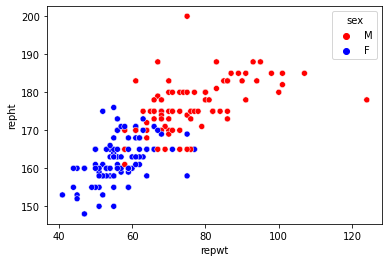

In [11]:
sns.scatterplot(y=data['repht'], x=data['repwt'], hue=data['sex'], palette=['red', 'blue'] )

### Отбрасывание записей, содержащих пропущенные значения

In [12]:
train = train.dropna(0)
train.isna().any()

sex       False
weight    False
height    False
repwt     False
repht     False
dtype: bool

In [13]:
test = test.dropna(0)
test.isna().any()

sex       False
weight    False
height    False
repwt     False
repht     False
dtype: bool

### Отбрасывание нереалистичных значений по правилу 3-х сигм

In [14]:
stds = train.std()

<AxesSubplot:xlabel='weight', ylabel='height'>

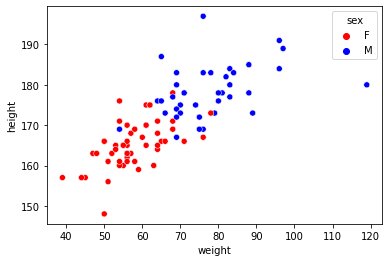

In [15]:
means = train.mean()
sns.scatterplot(x=train['weight'],  y=train['height'], hue=train['sex'], palette=['red', 'blue'] )


<AxesSubplot:xlabel='weight', ylabel='height'>

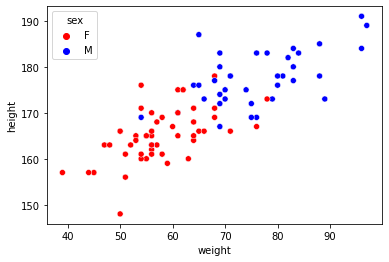

In [16]:
lower = means - 3 * stds
upper = means + 3 * stds
col = train.columns[1:]
col
train = train[((train[col] > lower) & (train[col] < upper)).all(1)]
sns.scatterplot(x=train['weight'],  y=train['height'], hue=train['sex'], palette=['red', 'blue'] )


In [17]:
train

,sex,weight,height,repwt,repht
88,F,53,165,53.0,165.0
75,F,50,166,50.0,161.0
128,F,45,157,45.0,153.0
166,F,59,159,59.0,155.0
85,F,56,170,56.0,170.0
...,...,...,...,...,...
124,F,55,165,55.0,163.0
144,F,54,176,55.0,176.0
105,F,62,175,63.0,173.0
168,F,66,166,66.0,165.0


<AxesSubplot:xlabel='weight', ylabel='height'>

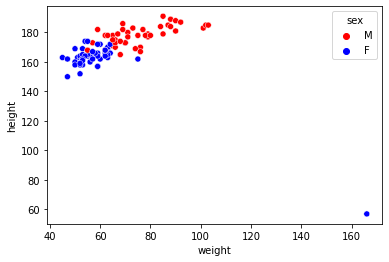

In [18]:
sns.scatterplot(x=test['weight'],  y=test['height'], hue=test['sex'], palette=['red', 'blue'] )


<AxesSubplot:xlabel='weight', ylabel='height'>

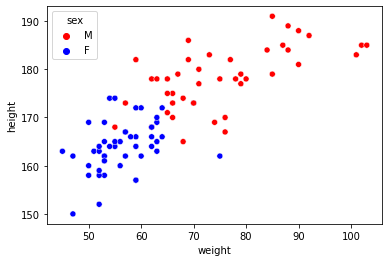

In [19]:

col = test.columns[1:]
test = test[((test[col] < upper) & (test[col] > lower)).all(1)]

sns.scatterplot(x=test['weight'],  y=test['height'], hue=test['sex'], palette=['red', 'blue'] )

In [20]:
test

,sex,weight,height,repwt,repht
120,M,65,178,66.0,178.0
27,F,63,169,61.0,168.0
101,F,55,164,55.0,163.0
95,M,88,189,87.0,185.0
61,M,68,165,69.0,165.0
...,...,...,...,...,...
79,M,69,182,70.0,180.0
116,F,62,168,62.0,163.0
5,F,59,157,59.0,155.0
180,M,68,174,68.0,173.0


## в) График выборки train

<AxesSubplot:xlabel='weight', ylabel='height'>

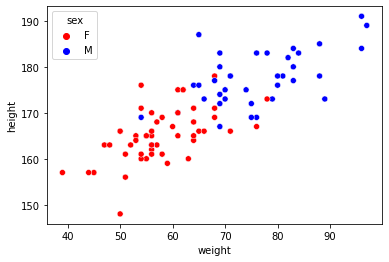

In [21]:

sns.scatterplot(x=train['weight'],  y=train['height'], hue=train['sex'], palette=['red', 'blue'] )


## Гистограммы

### Роста и веса в целом

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>]], dtype=object)

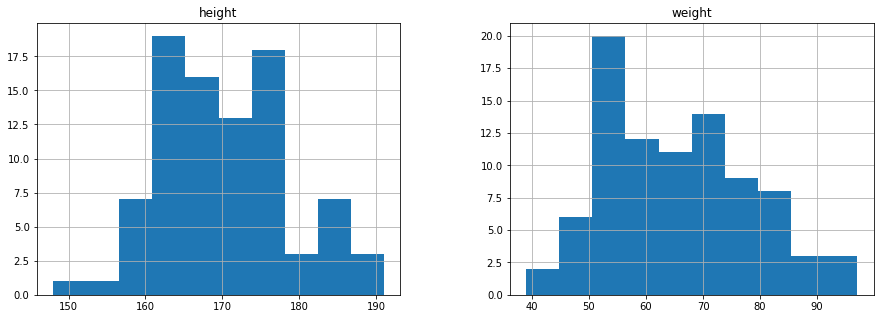

In [22]:
train[['height', 'weight']].hist(figsize=(15, 5))

In [23]:
train_male = train[train['sex'] == 'M']
train_female = train[train['sex'] == 'F']

### Роста и веса мужчин

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>]], dtype=object)

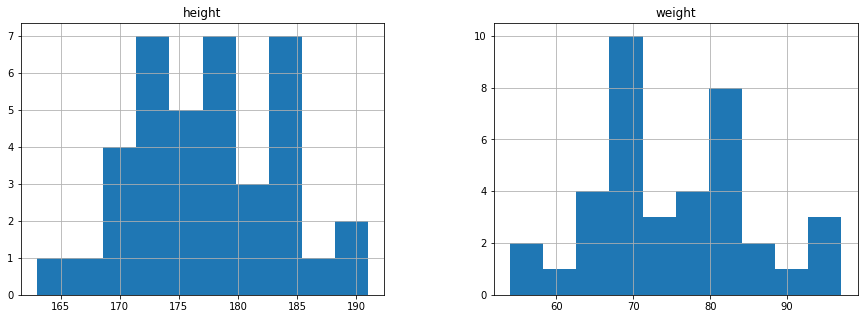

In [24]:
train_male[['height', 'weight']].hist(figsize=(15, 5))

### Роста и веса женщин

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>]], dtype=object)

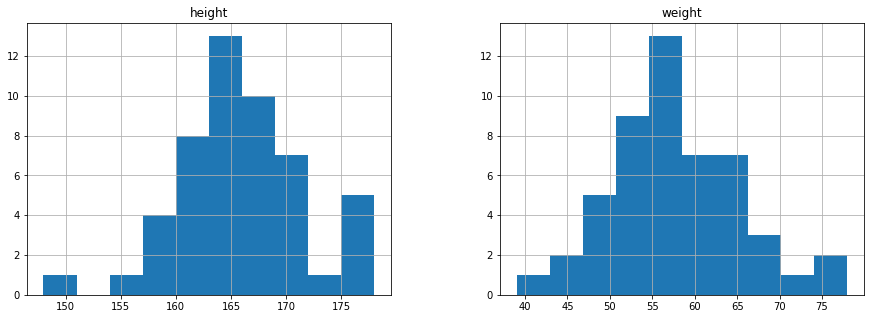

In [25]:
train_female[['height', 'weight']].hist(figsize=(15, 5))

### Величина (repwt - weight) в целом

<AxesSubplot:>

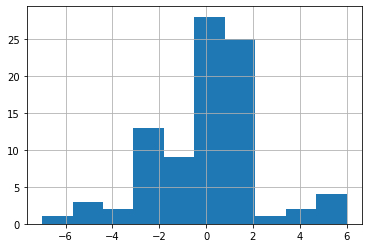

In [26]:
(train['repwt'] - train['weight']).hist()

### Величина (repwt - weight) только мужчины

<AxesSubplot:>

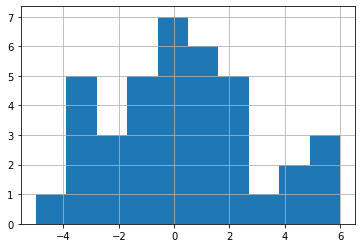

In [27]:
(train_male['repwt'] - train_male['weight']).hist()

### Величина (repwt - weight) только женщины


<AxesSubplot:>

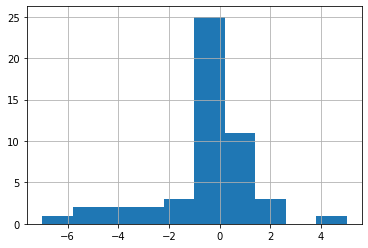

In [28]:
(train_female['repwt'] - train_female['weight']).hist()

### Величина (repht - height) в целом

<AxesSubplot:>

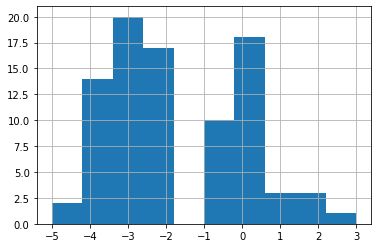

In [29]:
(train['repht'] - train['height']).hist()

### Величина (repht - height) только мужчины

<AxesSubplot:>

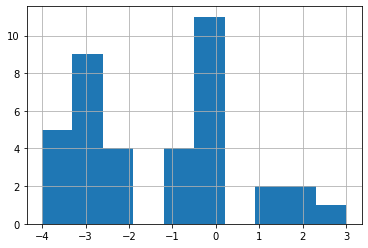

In [30]:
(train_male['repht'] - train_male['height']).hist()

### Величина (repht - height) только женщины

<AxesSubplot:>

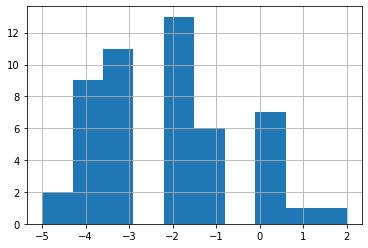

In [31]:
(train_female['repht'] - train_female['height']).hist()

In [32]:
train[(train['sex'] == 'F')][['weight', 'height']].cov()
np.cov(train[(train['sex'] == 'F')]['weight'], train[(train['sex'] == 'F')]['height'])

array([[60.70408163, 25.09387755],
       [25.09387755, 33.4922449 ]])

## Генератор данных

In [33]:
class PointGenerator:
    def __init__(self):
        self.p_woman = None
        self.p_man = None
        self.mean_height = {
            'M' : None,
            'F' : None,
        }
        self.mean_weight = {
            'M' : None,
            'F' : None,
        }
        self.cov = {
            'M' : None,
            'F' : None,
        }
        self.columns = ['height', 'weight']
    
    def fit(self, X_train : pd.DataFrame):
        self.p_woman = (X_train['sex'] == 'F').sum() / X_train['sex'].count()
        self.p_man = 1 - self.p_woman
        
        X_train_male = X_train[(X_train['sex'] == 'M')]
        X_train_fem = X_train[(X_train['sex'] == 'F')]
        
        self.mean_height['M'] = X_train_male['height'].mean() 
        self.mean_height['F'] = X_train_fem['height'].mean() 
        
        self.mean_weight['M'] = X_train_male['weight'].mean() 
        self.mean_weight['F'] = X_train_fem['weight'].mean() 
        
        self.cov['M'] = X_train_male[self.columns].cov()
        self.cov['F'] = X_train_fem[self.columns].cov()
    
    def generate_points(self, n_points):
        res_data = pd.DataFrame(columns=['height', 'weight', 'sex'])
        
        for i in range(n_points):
            sex = np.random.choice(['M', 'F'], p=[self.p_man, self.p_woman])
            height, weight = np.random.multivariate_normal(mean=[self.mean_height[sex], self.mean_weight[sex]], cov=self.cov[sex])
            height, weight = np.around(height), np.around(weight) 
            res_data.loc[i] = [height, weight, sex]
            
        return res_data
    
    def log_likelihood(self, X):
        
        X_male = X[(X['sex'] == 'M')][self.columns]
        X_fem = X[(X['sex'] == 'F')][self.columns]
        male_log = np.log(self.p_man * stats.multivariate_normal.pdf(X_male, mean=[self.mean_height['M'], self.mean_weight['M']], cov=self.cov['M']))
        fem_log = np.log(self.p_woman * stats.multivariate_normal.pdf(X_fem, mean=[self.mean_height['F'], self.mean_weight['F']], cov=self.cov['F']))
        return np.concatenate([male_log, fem_log])
    
    def mean_log_likelihood(self, X):
        
        return self.log_likelihood(X).mean()
        

In [34]:
pg = PointGenerator()
pg.fit(train)
gen_points = pg.generate_points(100)
print(pg.mean_log_likelihood(train))
print(pg.mean_log_likelihood(gen_points))

-7.260634824711946
-7.248398306137516


<AxesSubplot:xlabel='height', ylabel='weight'>

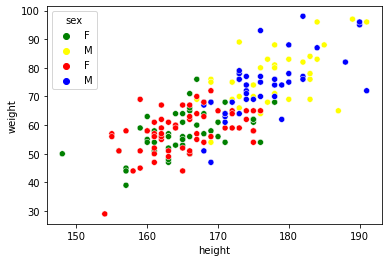

In [35]:
sns.scatterplot(x=train.height, y=train.weight, hue=train.sex, palette=['green', 'yellow'] )
sns.scatterplot(x=gen_points.height, y=gen_points.weight, hue=gen_points.sex, palette=['red', 'blue'] )
# Зеленый и желтый для train выборки, красный и синий для сгенерированных значений

# Задание 2.


### Реализация градиентного спуска

In [36]:
def avg_loss(x_height: pd.DataFrame, y_weight: pd.DataFrame, w, b):
    N = len(x_height)
    total_err = 0.0
    for i in range(N):
        total_err += (y_weight.iloc[i] - (w * x_height.iloc[i] + b ))**2
    
    return total_err / float(N)

In [37]:
def upd_members(x_height: pd.DataFrame, y_weight: pd.DataFrame, w_begin, b_begin, alpha):
    dw = 0.0
    db = 0.0
    N = len(x_height)
    
    for i in range(N):
        dw += -2 * x_height.iloc[i] * (y_weight.iloc[i] - (w_begin * x_height.iloc[i] + b_begin))
        db += -2 * (y_weight.iloc[i] - (w_begin * x_height.iloc[i] + b_begin))
        
    w = w_begin - (1 / float(N)) * alpha * dw
    b = b_begin - (1 / float(N)) * alpha * db
    
    
    return w, b

In [38]:
def fit(x_height: pd.DataFrame, y_weight: pd.DataFrame, w, b, alpha, epochs):
    wb_past = {'w':[], 'b':[]} 
    for e in range(epochs):
        w, b  = upd_members(x_height, y_weight, w, b, alpha)
        
        if e % 500 == 0:
            wb_past['w'].append(w)
            wb_past['b'].append(b)
            
            
            print(f'epoch = {e}; loss = {avg_loss(x_height, y_weight, w, b)}')
    
    return (lambda x : w * x + b), wb_past

### Нормализация данных и обучение

In [39]:

x_norm = (train.height - train.height.min()) / (train.height.max() - train.height.min())
y_norm = (train.weight - train.weight.min()) / (train.weight.max() - train.weight.min())

predict, wb_past = fit(x_norm, y_norm, 0.0, 0.0, 0.01, 5000)

epoch = 0; loss = 0.2427041250087612
epoch = 500; loss = 0.027322761658765335
epoch = 1000; loss = 0.022919453619700138
epoch = 1500; loss = 0.020489046799792215
epoch = 2000; loss = 0.01914758323208773
epoch = 2500; loss = 0.018407162126971438
epoch = 3000; loss = 0.01799848653853202
epoch = 3500; loss = 0.017772917959473118
epoch = 4000; loss = 0.01764841533367905
epoch = 4500; loss = 0.017579696082556863


### График выборки и результата обучения

<AxesSubplot:xlabel='height', ylabel='weight'>

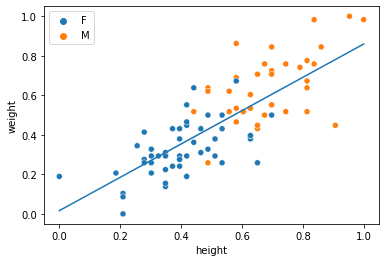

In [40]:
sns.scatterplot(x=x_norm, y=y_norm, hue=train.sex)
sns.lineplot(x=x_norm, y=predict(x_norm))


In [41]:
def denormilize_predict(height):
    return predict((height - train.height.min()) / (train.height.max() - train.height.min())) * (train.weight.max() - train.weight.min()) + train.weight.min()

denormilize_predict(177)


72.92585766419106

### Визуализация градиентного спуска

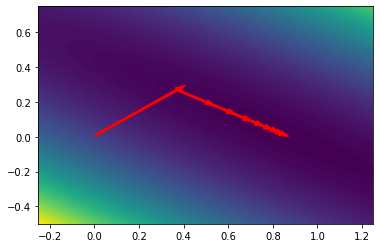

In [42]:
ww,bb = np.mgrid[-0.25:1.25:100j,-0.5:0.75:100j]
Q = np.zeros(shape = (100,100))

for i in range(100):
    for j in range(100):
        Q[i,j] = avg_loss(x_norm, y_norm, ww[i,j], bb[i,j])
        
plt.contourf(ww, bb, Q, levels=200)
for i in range(len(wb_past['w']) - 1):
    plt.arrow(wb_past['w'][i], wb_past['b'][i],wb_past['w'][i + 1] - wb_past['w'][i], wb_past['b'][i + 1] - wb_past['b'][i], color='RED', width=0.01)


### Сравнение градиентного спуска и линейной регрессии(sklearn)

<AxesSubplot:xlabel='height', ylabel='weight'>

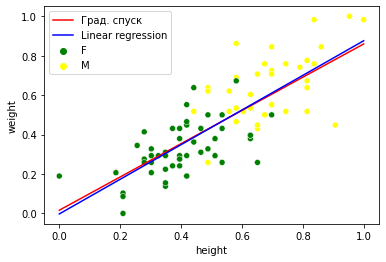

In [44]:
lin_reg = LinearRegression()

x = np.array(x_norm)

lin_reg.fit(x.reshape(-1, 1), y_norm)

sns.scatterplot(x=x_norm, y=y_norm, hue=train.sex, palette=['green', 'yellow'])
sns.lineplot(x=x_norm, y=predict(x_norm), label='Град. спуск', color='RED')
sns.lineplot(x=x_norm, y=lin_reg.predict(x.reshape(-1, 1)), label='Linear regression', color='BLUE')

### Градиентный спуск для трех переменных

In [45]:
def avg_loss_2wb(x: pd.DataFrame, y_weight: pd.DataFrame, w1, w2, b):
    N = len(x.height)
    total_err = 0.0
    for i in range(N):
        total_err += (y_weight.iloc[i] - (w1 * x.height.iloc[i] + w2 * x.M.iloc[i] + b ))**2
    
    return total_err / float(N)

In [46]:
def upd_members_2wb(x: pd.DataFrame, y_weight: pd.DataFrame, w1_begin, w2_begin, b_begin, alpha):
    dw1 = 0.0
    dw2 = 0.0
    db = 0.0
    N = len(x.height)
    
    for i in range(N):
        dw1 += -2 * x.height.iloc[i] * (y_weight.iloc[i] - (w1_begin * x.height.iloc[i] + w2_begin * x.M.iloc[i] + b_begin))
        dw2 += -2 * x.M.iloc[i] * (y_weight.iloc[i] - (w1_begin * x.height.iloc[i] + w2_begin * x.M.iloc[i] + b_begin))
        db += -2 * (y_weight.iloc[i] - (w1_begin * x.height.iloc[i] + w2_begin * x.M.iloc[i] + b_begin))
        
    w1 = w1_begin - (1 / float(N)) * alpha * dw1
    w2 = w2_begin - (1 / float(N)) * alpha * dw2
    b = b_begin - (1 / float(N)) * alpha * db
    
    
    return w1, w2, b

In [47]:
def fit2w(x: pd.DataFrame, y_weight: pd.DataFrame, w1, w2, b, alpha, epochs):
    wb_past = {'w1':[], 'w2':[], 'b':[]} 
    for e in range(epochs):
        w1, w2, b  = upd_members_2wb(x, y_weight, w1, w2, b, alpha)
        
        if e % 500 == 0:
            wb_past['w2'].append(w2)
            wb_past['w1'].append(w1)
            wb_past['b'].append(b)
            
            
            print(f'epoch = {e}; loss = {avg_loss_2wb(x, y_weight, w1, w2, b)}')
    
    return (lambda x: w1 * x.height + w2 * x.M + b), wb_past

In [48]:
X_train = pd.get_dummies(train, columns=['sex'])
X_train.drop(['weight', 'repwt', 'repht', 'sex_F'], axis=1, inplace=True)
X_train.columns = ['height', 'M']
X_norm = X_train
X_norm['height'] = (X_train.height - X_train.height.min()) / (X_train.height.max() - X_train.height.min())

predict2w, _ = fit2w(X_norm, y_norm, 2, 1, 3, 0.01, 3000)

epoch = 0; loss = 15.590485807162487
epoch = 500; loss = 0.01712370268422517
epoch = 1000; loss = 0.01563484789407304
epoch = 1500; loss = 0.015593648020328775
epoch = 2000; loss = 0.015582684468004199
epoch = 2500; loss = 0.015574978118239248


In [49]:
def denormilize_predict_2wb(x):
    x.height = (x.height - train.height.min()) / (train.height.max() - train.height.min())
    return predict2w(x) * (train.weight.max() - train.weight.min()) + train.weight.min()

denormilize_predict_2wb(pd.DataFrame([[177, 1], [169, 0]], columns=['height', 'M']))

0    75.361672
1    60.871117
dtype: float64

### График выборки и результатов обучения и сравнение с линейной регрессией(sklearn)

<AxesSubplot:xlabel='height', ylabel='weight'>

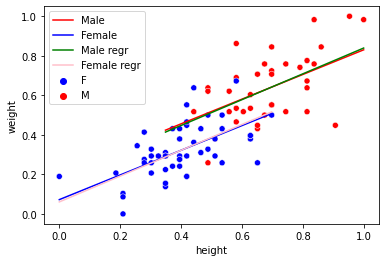

In [50]:
x_male = X_norm[X_norm['M'] == 1]
x_female = X_norm[X_norm['M'] == 0]

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_norm, y_norm)
lin_reg_2.predict(x_female)

sns.scatterplot(x=x_norm, y=y_norm, hue=train.sex, palette=['blue', 'red'])
sns.lineplot(x=x_male.height, y=predict2w(x_male), label='Male', color='RED')
sns.lineplot(x=x_female.height, y=predict2w(x_female), label='Female', color='BLUE')

sns.lineplot(x=x_male.height, y=lin_reg_2.predict(x_male), label='Male regr', color='green')
sns.lineplot(x=x_female.height, y=lin_reg_2.predict(x_female), label='Female regr', color='pink')